In [1]:
%matplotlib inline
from skimage import io, color,data,segmentation
import numpy as np

####Load some cool image

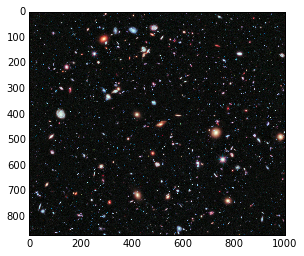

In [2]:
img = data.hubble_deep_field();
img_gray = color.rgb2gray(img)
io.imshow(img)

####Lets do some superpixel stuff

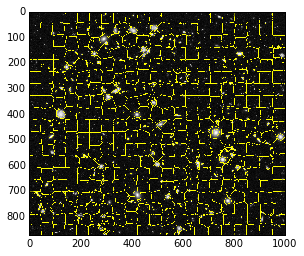

In [3]:
segment_map= segmentation.slic(img,400, compactness=30); #100 is default
img_contours = segmentation.mark_boundaries(img_gray,segment_map)
io.imshow(img_contours)

In [4]:
print segment_map

[[  0   0   0 ...,  20  20  20]
 [  0   0   0 ...,  20  20  20]
 [  0   0   0 ...,  20  20  20]
 ..., 
 [378 378 378 ..., 398 398 398]
 [378 378 378 ..., 398 398 398]
 [378 378 378 ..., 398 398 398]]


####Find the Best(??) superpixels

In [5]:

def calc_statistics(img,segments):
    sup_brightness = [np.mean(img[segments==i]) for i in range(0,np.amax(segments)+1)]
    return sup_brightness
        
def look_at_brightest(superpixel_intensities, nr_select=3):
    thresh = sorted(superpixel_intensities)[-1*nr_select]
    return thresh

In [6]:
sup_intensities = calc_statistics(img_gray,segment_map);
sup_thresh = look_at_brightest(sup_intensities,10)    
sup_selected = [1 if s > sup_thresh else 0 for s in sup_intensities]

In [7]:
print sup_selected

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [8]:
def process_finally(img,sup_selected,segments):
    newimg = np.array(img, copy=True)
    for s in range(0,np.amax(segments)+1):
        newimg[np.where(segments==s)] = sup_selected[s] * img[np.where(segments==s)]
        
    return newimg 

/home/prassanna/anaconda/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warnings.warn("Low image dynamic range; displaying image with "


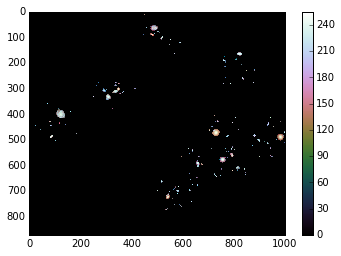

In [9]:
img_processed = process_finally(img, sup_selected, segment_map)
io.imshow(img_processed)
    #np.vstack((img,img_processed)))